## Setup MDP environment and automaton based on LTL Specification 

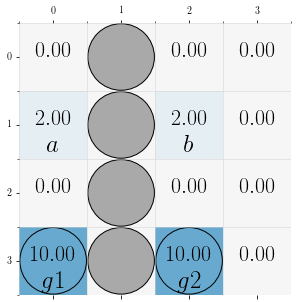

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy
from csrl.oa import OmegaAutomaton

shape = n_rows, n_cols = (4,4)

structure = np.array([
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['T','B','T','E'],
['E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('g1',)
label[3,2] = ('g2',)

rew_structure =  np.empty(shape,dtype=float)
rew_structure.fill(0.0)
rew_structure[1,0] = 2
rew_structure[1,2] = 2
rew_structure[3,2] = 10
rew_structure[3,0] = 10
    
grid_mdp = GridMDP(shape=shape, reward=rew_structure, structure=structure,label=label,figsize=5, p=0.8)
grid_mdp.plot()

### Original LTL Specification

In [2]:
# LTL Specification
ltl = '((Fa & !g1) U (a & b)) & ((Fb & !g2) U (a&b)) & (FG g1) & (FG g2)'

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl, extra_aps=grid_mdp.all_labels)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
display(oa1)

Number of Omega-automaton states (including the trap state): 4


### Alternate LTL Specification

In [3]:
ltl2 = 'F( (a&b) & XF ( (g1 | XF g1) &  ( g2 | XF g2)) )'
oa2 = OmegaAutomaton(ltl2, extra_aps=grid_mdp.all_labels)
display(oa2)

### Compute pair product MDP (agent x MDP). 
Use oa2 for alternate specification

In [4]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa1) 

In [5]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1, csrl2], oa = oa1, starts=[(0, 0), (0, 3)], mdp=grid_mdp, sharedoa=True)
mcsrl.shape

(2, 1, 4, 4, 4, 8)

### Multi-agent Reward Shaping 
Episodes > 30k 

In [6]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [7]:
from logger import Trace

In [23]:
qval, ep_returns, trace = mcsrl.combined_qlearning(T=70,offset=10, K=75000, debug=False)

episode :0
episode :7500
episode :15000
episode :22500
episode :30000
episode :37500
episode :45000
episode :52500
episode :60000
episode :67500


In [24]:
trace.df.head(n=25)

,iteration,episode,step,labels,labels_seen,state_0,state_1,reward_0,reward_1,action_0,action_1,available_actions_0,available_actions_1
0,0,74991,0,"(g1, g2)",{},"[0, 0, 0, 0]","[0, 0, 0, 3]",0.00,0.00,[1],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
1,0,74991,1,"(a,)",{a},"[0, 0, 1, 0]","[0, 0, 0, 2]",0.00,0.00,[0],[1],"[0, 1, 2, 3]","[0, 1, 2, 3]"
2,0,74991,2,"(b,)","{a, b}","[0, 0, 0, 0]","[0, 0, 1, 2]",0.00,0.00,[1],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
3,0,74991,3,"(b,)","{a, b}","[0, 0, 0, 0]","[0, 0, 1, 2]",0.00,0.00,[1],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
4,0,74991,4,"(a,)","{a, b}","[0, 0, 1, 0]","[0, 0, 2, 2]",0.00,0.00,[0],[0],"[0, 1, 2, 3]","[0, 1, 2, 3]"
5,0,74991,5,"(a, b)","{a, b}","[0, 1, 1, 0]","[0, 1, 1, 2]",0.00,0.00,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
6,0,74991,6,(),"{a, b}","[0, 1, 2, 0]","[0, 1, 2, 2]",0.00,0.00,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
7,0,74991,7,"(g2,)","{a, g2, b}","[0, 1, 2, 0]","[0, 1, 3, 2]",0.00,0.00,[1],[3],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
8,0,74991,8,"(g1, g2)","{g1, a, g2, b}","[0, 1, 3, 0]","[0, 1, 3, 2]",0.00,0.00,[6],[3],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
9,0,74991,9,"(g1, g2)","{g1, a, g2, b}","[0, 2, 3, 0]","[0, 2, 3, 2]",0.01,0.01,[0],[0],"[0, 1, 2, 3]","[0, 1, 2, 3]"


In [25]:
policies = [np.argmax(qval[0],axis=4), np.argmax(qval[1],axis=4)]
values = [np.max(qval[0],axis=4), np.max(qval[1],axis=4)]

#### Plot results and smooth

Text(0.5, 1.0, 'return per episode')

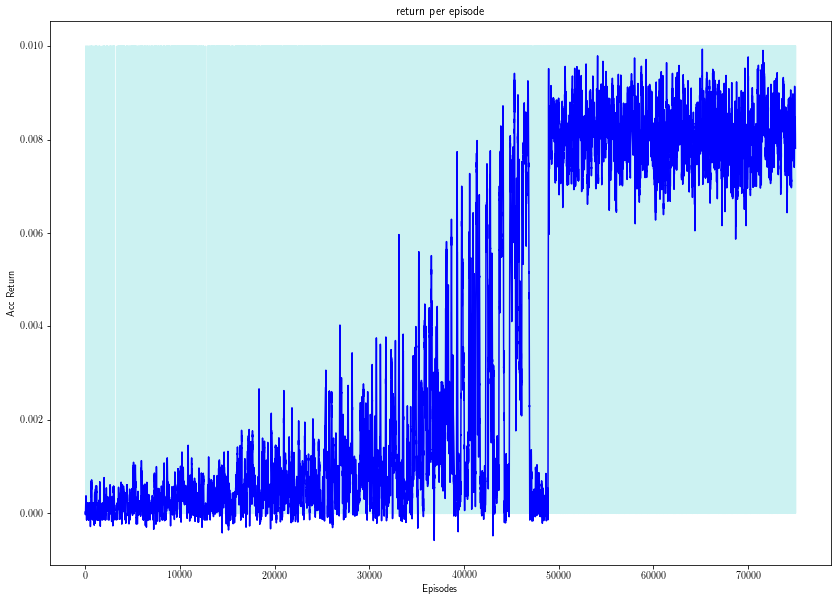

In [26]:
plt.figure(figsize=(14, 10))
plt.plot( ep_returns[:,0], color='c', label='agent 0', alpha=0.2)
yhat = savgol_filter(ep_returns[:,0], 101, 3) # window size 101, polynomial order 3
yhat2 = savgol_filter(ep_returns[:,1], 101, 3)
plt.plot(yhat, color='b', label='smooth')
# plt.plot(yhat2, color='g', label='smooth2')
# plt.plot(np.arange(0, ep_returns.shape[0]), ep_returns[:,1], color='g',  label='agent 1')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Episodes")
plt.ylabel("Acc Return")
plt.title("return per episode")

#### Save trace and returns

In [17]:
trace.save('shared_oa_ex2_returns_df.csv')
np.savetxt('shared_oa_ex2_returns.csv', ep_returns, delimiter=',')

In [28]:
mcsrl.plot(1, policies[1], values[1])

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

### Baseline: Independent QL 

In [5]:
qval_base, ep_returns_base, base_trace = mcsrl.combined_qlearning_noshaping(T=70, K=75000, map= 'bench1', debug=False)

(2, 4, 4, 4)


In [6]:
policies_b = [np.argmax(qval_base[0],axis=2), np.argmax(qval_base[1],axis=2)]
values_b = [np.max(qval_base[0],axis=2), np.max(qval_base[1],axis=2)]

#### Plot and smooth results

Text(0.5, 1.0, 'return per episode')

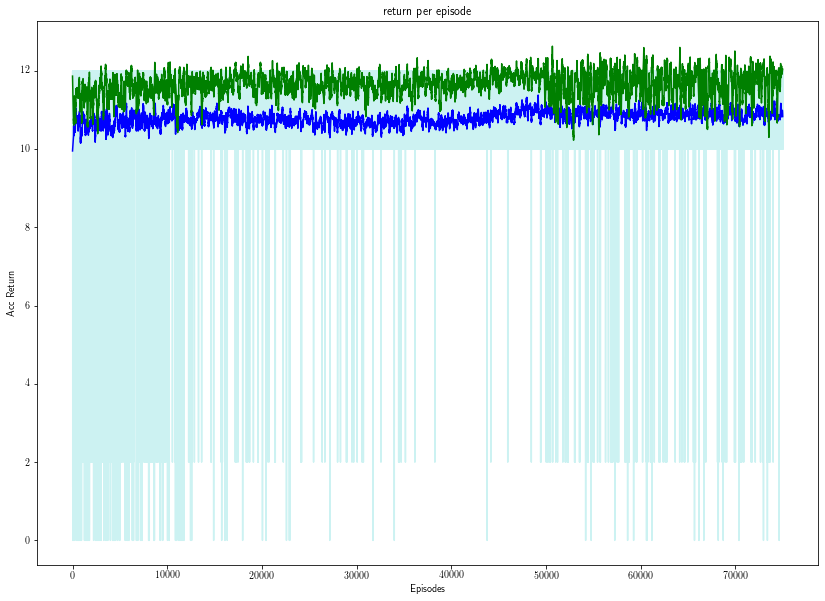

In [9]:
plt.figure(figsize=(14, 10))
plt.plot( ep_returns_base[:,0], color='c', label='agent 0', alpha=0.2)
# plt.plot( ep_returns_base[:,0], color='m', label='agent 0', alpha=0.2)
yhat = savgol_filter(ep_returns_base[:,0], 201, 3) # window size 101, polynomial order 3
yhat2 = savgol_filter(ep_returns_base[:,1], 201, 3)
plt.plot(yhat, color='b', label='smooth')
plt.plot(yhat2, color='g', label='smooth2')
# plt.plot(np.arange(0, ep_returns.shape[0]), ep_returns[:,1], color='g',  label='agent 1')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Episodes")
plt.ylabel("Acc Return")
plt.title("return per episode")

In [10]:
base_trace.save('shared_oa_ex2_returns_df_base.csv')
np.savetxt('shared_oa_ex2_returns_base.csv', ep_returns_base, delimiter=',')

### Plotting & video

In [27]:
from plotter import Plotter
from annotation import Annotation

#### Create annotation class for video plotting

In [47]:
annotation = Annotation(grid_mdp, oa1, interactive= ['a', 'b'], targets=['g1', 'g2'])

In [78]:
df_t=trace.get_episode(74995)
df_t.head(n=7)

,iteration,episode,step,labels,labels_seen,state_0,state_1,reward_0,reward_1,action_0,action_1,available_actions_0,available_actions_1
280,0,74995,0,"(g1, g2)",{},"[0, 0, 0, 0]","[0, 0, 0, 3]",0.00,0.00,[1],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
281,0,74995,1,"(a,)",{a},"[0, 0, 1, 0]","[0, 0, 0, 2]",0.00,0.00,[0],[1],"[0, 1, 2, 3]","[0, 1, 2, 3]"
282,0,74995,2,"(b,)","{a, b}","[0, 0, 0, 0]","[0, 0, 1, 2]",0.00,0.00,[1],[3],"[0, 1, 2, 3]","[0, 1, 2, 3]"
283,0,74995,3,"(a, b)","{a, b}","[0, 1, 1, 0]","[0, 1, 1, 2]",0.00,0.00,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
284,0,74995,4,(),"{a, b}","[0, 1, 2, 0]","[0, 1, 2, 2]",0.00,0.00,[1],[1],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
285,0,74995,5,"(g1, g2)","{g1, a, g2, b}","[0, 1, 3, 0]","[0, 1, 3, 2]",0.00,0.00,[6],[3],"[0, 1, 2, 3, 6]","[0, 1, 2, 3, 6]"
286,0,74995,6,"(g1, g2)","{g1, a, g2, b}","[0, 2, 3, 0]","[0, 2, 3, 2]",0.01,0.01,[0],[0],"[0, 1, 2, 3]","[0, 1, 2, 3]"


In [81]:
video_recorder = Plotter(annotation, grid_mdp)

#### Save episode to video

In [83]:
video_recorder.record('sharedoa2/shared_oa_ex2_maptest_returns.mp4', trace.get_episode(74995).head(7))

100%|██████████| 7/7 [00:00<00:00, 21.39it/s]


<Figure size 432x288 with 0 Axes>